**Import Required Libraries**

In [ ]:
!pip install roboflow
!pip install ultralytics==8.0.196

**Load Dataset**

In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key="lWjBywj3M1I4YI09jTmu")
project = rf.workspace("road-crack-project").project("road-crack-detection-combined-dataset")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Road-Crack-Detection-Combined-Dataset-2 in yolov8:: 100%|██████████| 3510/3510 [00:00<00:00, 3923.36it/s]


**Create Yolo V8 Object Detection Model**

In [8]:
from ultralytics import YOLO

In [9]:
# Load a model
model = YOLO('yolov8n.yaml')
model = YOLO('yolov8n.pt')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

**Train the Yolo V8 Model on Road Crack Dataset**

In [10]:
# train the model
results = model.train(data = '/content/Road-Crack-Detection-Combined-Dataset-2/data.yaml', epochs = 100)

New https://pypi.org/project/ultralytics/8.2.17 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Road-Crack-Detection-Combined-Dataset-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, vi

**Training Results**

In [11]:
import pandas as pd

train_results = pd.read_csv("/content/runs/detect/train2/results.csv")
train_results.tail()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
70,71,1.1462,0.88684,1.1304,0.59407,0.55724,0.53627,0.28724,1.7033,1.2679,1.5193,0.000396,0.000396,0.000396
71,72,1.1262,0.87063,1.1182,0.62130,0.53471,0.52548,0.27687,1.7153,1.3046,1.5403,0.000384,0.000384,0.000384
72,73,1.1469,0.89595,1.1315,0.61011,0.55945,0.52342,0.27411,1.6971,1.3149,1.5038,0.000371,0.000371,0.000371
73,74,1.1257,0.85611,1.1188,0.60829,0.56222,0.53323,0.28631,1.7176,1.2647,1.5218,0.000359,0.000359,0.000359
74,75,1.1053,0.84682,1.1129,0.60171,0.53646,0.53742,0.29268,1.7173,1.2940,1.5425,0.000347,0.000347,0.000347


(-0.5, 2399.5, 1199.5, -0.5)

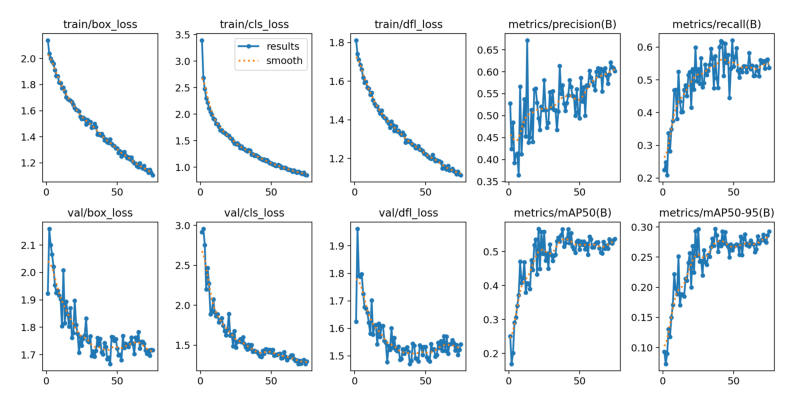

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
train_res = plt.imread("/content/runs/detect/train2/results.png")
plt.imshow(train_res)
plt.axis("off")

**R_curve**

(-0.5, 2249.5, 1499.5, -0.5)

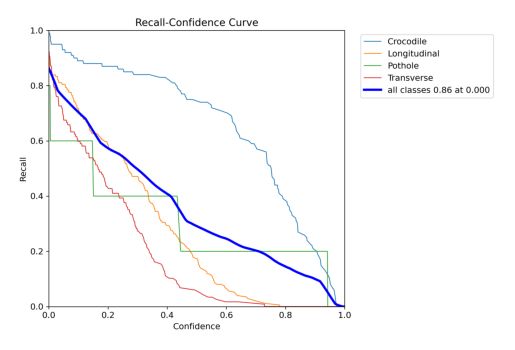

In [13]:
import matplotlib.pyplot as plt

r_curve = plt.imread("/content/runs/detect/train2/R_curve.png")
plt.imshow(r_curve)
plt.axis("off")

**P-Curve**

(-0.5, 2249.5, 1499.5, -0.5)

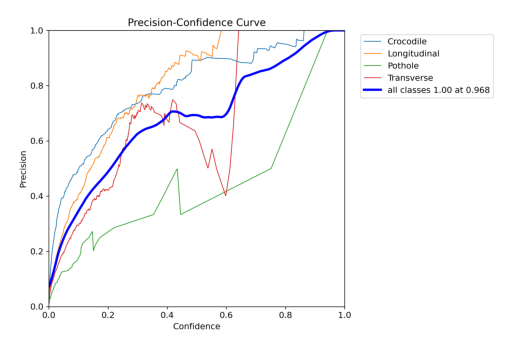

In [14]:
import matplotlib.pyplot as plt

p_curve = plt.imread("/content/runs/detect/train2/P_curve.png")
plt.imshow(p_curve)
plt.axis("off")

**PR_curve**

(-0.5, 2249.5, 1499.5, -0.5)

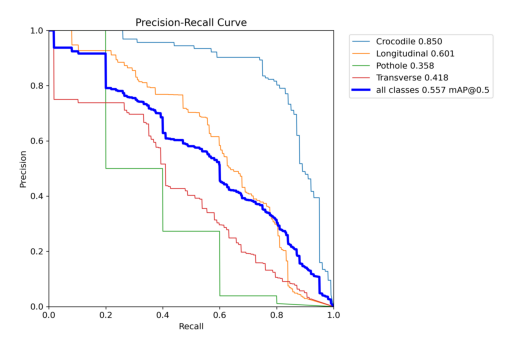

In [15]:
import matplotlib.pyplot as plt

pr_curve = plt.imread("/content/runs/detect/train2/PR_curve.png")
plt.imshow(pr_curve)
plt.axis("off")

**F1_curve**

(-0.5, 2249.5, 1499.5, -0.5)

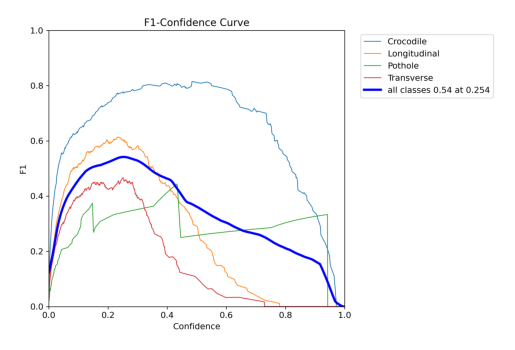

In [16]:
import matplotlib.pyplot as plt

f1_curve = plt.imread("/content/runs/detect/train2/F1_curve.png")
plt.imshow(f1_curve)
plt.axis("off")

**Confusion Matrix**

(-0.5, 2999.5, 2249.5, -0.5)

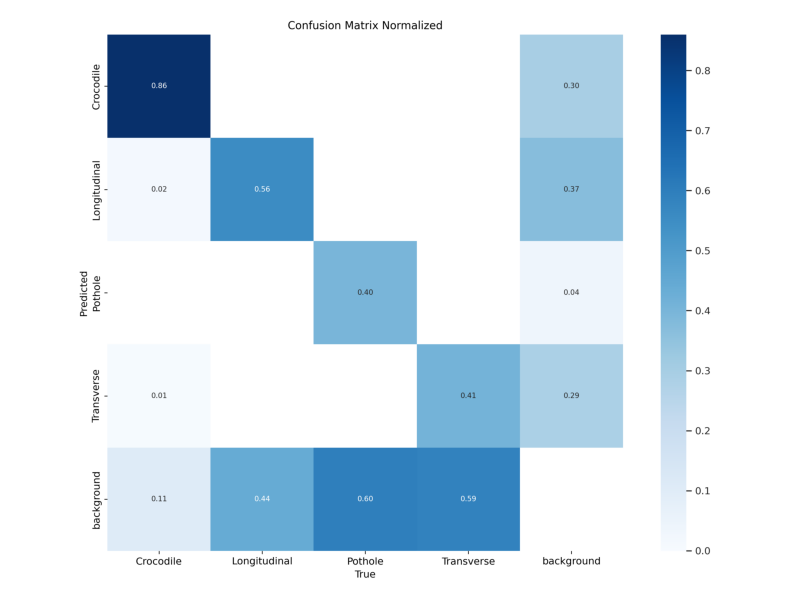

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
cm = plt.imread("/content/runs/detect/train2/confusion_matrix_normalized.png")
plt.imshow(cm)
plt.axis("off")

**Validate results the Yolo V8 on Validation Dataset**

**R_curve**

In [18]:
model.val()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Road-Crack-Detection-Combined-Dataset-2/valid/labels.cache... 190 images, 0 backgrounds, 0 corrupt: 100%|██████████| 190/190 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.55it/s]
                   all        190        396      0.582      0.529      0.559      0.295
             Crocodile        190        100      0.717       0.85      0.851       0.55
          Longitudinal        190        174      0.685        0.5      0.599      0.269
               Pothole        190          5      0.302        0.4      0.359      0.235
            Transverse        190  

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x791b1e197cd0>
fitness: 0.321381789991389
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.54974,     0.26878,     0.23475,     0.12683])
names: {0: 'Crocodile', 1: 'Longitudinal', 2: 'Pothole', 3: 'Transverse'}
plot: True
results_dict: {'metrics/precision(B)': 0.5817714047853073, 'metrics/recall(B)': 0.5294663530420033, 'metrics/mAP50(B)': 0.5585852375874736, 'metrics/mAP50-95(B)': 0.2950258513696018, 'fitness': 0.321381789991389}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 0.17118453979492188, 'inference': 5.820620687384355, 'loss': 0.0016450881958007812, 'postprocess': 2.1907731106406763}

(-0.5, 2249.5, 1499.5, -0.5)

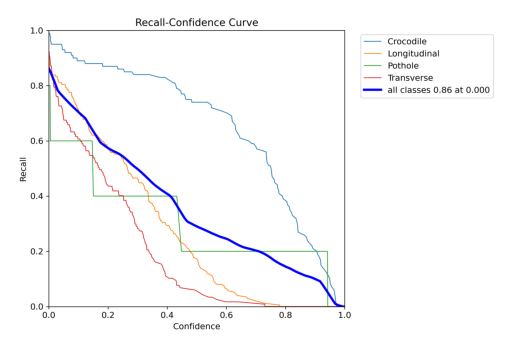

In [19]:
import matplotlib.pyplot as plt

r_curve = plt.imread("/content/runs/detect/val/R_curve.png")
plt.imshow(r_curve)
plt.axis("off")

**P-Curve**

(-0.5, 2249.5, 1499.5, -0.5)

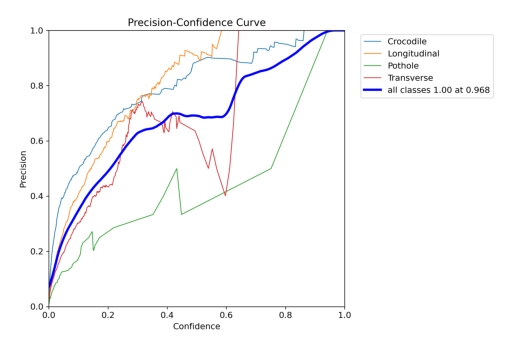

In [20]:
import matplotlib.pyplot as plt

p_curve = plt.imread("/content/runs/detect/val/P_curve.png")
plt.imshow(p_curve)
plt.axis("off")

**PR_curve**

(-0.5, 2249.5, 1499.5, -0.5)

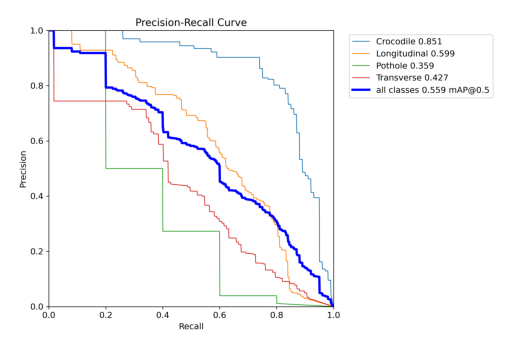

In [21]:
import matplotlib.pyplot as plt

pr_curve = plt.imread("/content/runs/detect/val/PR_curve.png")
plt.imshow(pr_curve)
plt.axis("off")

**F1_curve**

(-0.5, 2249.5, 1499.5, -0.5)

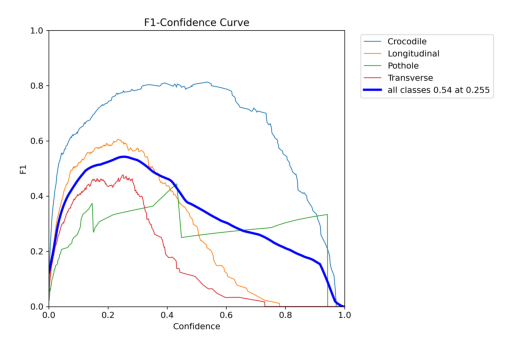

In [22]:
import matplotlib.pyplot as plt

f1_curve = plt.imread("/content/runs/detect/val/F1_curve.png")
plt.imshow(f1_curve)
plt.axis("off")

**Confusion Matrix**

(-0.5, 2999.5, 2249.5, -0.5)

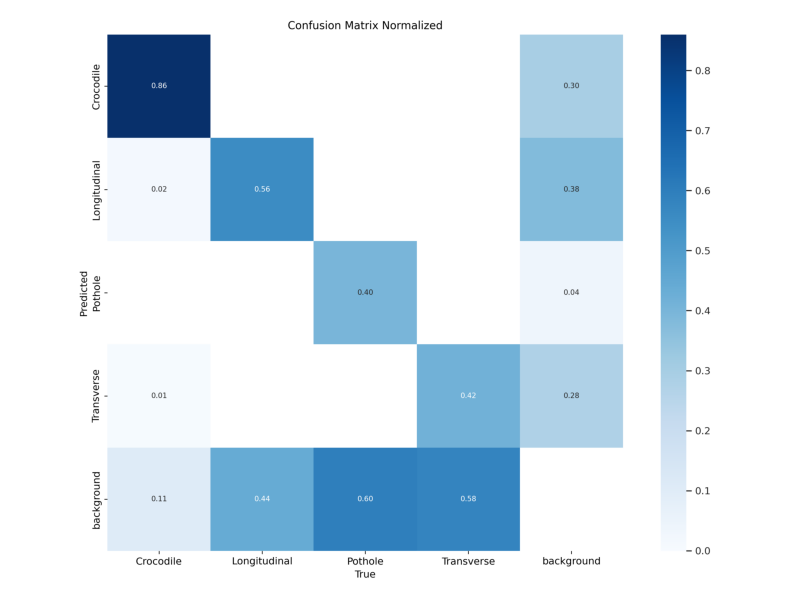

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
cm = plt.imread("/content/runs/detect/val/confusion_matrix_normalized.png")
plt.imshow(cm)
plt.axis("off")

**Visual Results**

(-0.5, 1919.5, 1099.5, -0.5)

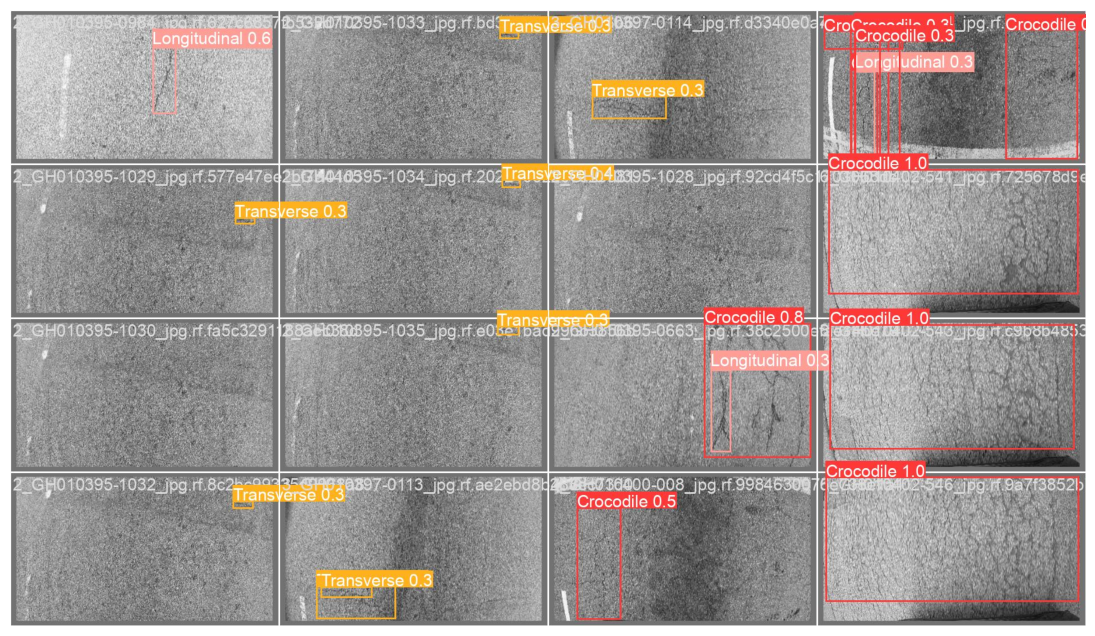

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 8))
labels = plt.imread("/content/runs/detect/val/val_batch2_pred.jpg")
plt.imshow(labels)
plt.axis("off")

**Test YOLO V8 Model on Test images**

In [27]:
# Run evaluation on the test image set
test_results = model.predict(source="/content/Road-Crack-Detection-Combined-Dataset-2/test/images", save=True)


image 1/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1019---Copy_jpg.rf.97797afc733e95ac2025d1d368f58068.jpg: 384x640 1 Crocodile, 1 Longitudinal, 11.2ms
image 2/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1072---Copy_jpg.rf.f6fb519bb6de940f9a56f181b5325462.jpg: 384x640 1 Crocodile, 11.0ms
image 3/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1131---Copy_jpg.rf.c3d5b11f5c4f82c71613b7e556c9356d.jpg: 384x640 (no detections), 9.5ms
image 4/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1171---Copy_jpg.rf.3dace60c37612ded87c6deb48a48cd94.jpg: 384x640 (no detections), 9.6ms
image 5/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1209---Copy_jpg.rf.a905478d978f14ef1926272933a7fde6.jpg: 384x640 (no detections), 9.7ms
image 6/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1231---Copy_jpg.rf.cf0eb4f16f676994ea2cf77f49539d63.jpg: 384x640 (no detections),

In [30]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Directory containing images
image_dir = '/content/runs/detect/predict2'

# Get a list of all files in the directory
all_files = os.listdir(image_dir)

# Filter out non-image files (optional, based on common image extensions)
image_files = [file for file in all_files if file.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp', 'tiff'))]

# Randomly select 10 images
random_images = random.sample(image_files, 6)

# Create a figure
fig, axes = plt.subplots(2, 3, figsize=(25, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

for ax, img_file in zip(axes, random_images):
    # Load image
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path)

    # Display image
    ax.imshow(img)
    #ax.set_title(img_file)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.